In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import datetime
%matplotlib inline

In [2]:
#n_sensors = 3
#n_sensors = 5
#n_sensors = 10
n_sensors = 15

In [3]:
#n_units=64
#n_units=128
n_units=256
#n_units=512
#n_units=1024

In [4]:
os.chdir('E:\\MLdataset')

In [5]:
x_csv = pd.read_csv('x_5degree_1rev.csv',header=None)

In [6]:
x_5degree = x_csv.to_numpy(dtype='float32')

In [7]:
x = x_5degree[:, 0:15]

In [8]:
x = x.reshape((73*6, n_sensors, 1))

In [9]:
y_5degree = pd.read_csv('y_output(1rev_5deg).csv',header=None)

In [10]:
os.chdir('C:\\Users\\User')

In [11]:
y_5degree = y_5degree.to_numpy(dtype='float32')

In [12]:
y = y_5degree.reshape((73*6, 100, 100))

In [13]:
tsr = x_5degree[:, -2]

In [14]:
theta = x_5degree[:, -1]

In [15]:
x_train, x_test, y_train, y_test, tsr_train, tsr_test, theta_train, theta_test= train_test_split(x,
                                                                                                 y,
                                                                                                 tsr,
                                                                                                 theta,
                                                                                                 test_size=0.1,
                                                                                                 random_state=42)

In [16]:
print(y_train.shape)

(394, 100, 100)


In [17]:
print(y_test.shape)

(44, 100, 100)


In [18]:
print(x_train.shape)

(394, 15, 1)


In [19]:
print(x_test.shape)

(44, 15, 1)


In [20]:
theta_train.shape

(394,)

In [21]:
tsr_train.shape

(394,)

In [22]:
tsr_test[10]

1.8

In [23]:
tsr_test[18]

1.6

In [24]:
theta_test[10]

360.0

In [25]:
theta_test[18]

0.0

In [26]:
os.chdir('C:\\Users\\User')

In [27]:
input_time = tf.keras.Input(shape=(2, 1))
reshape = tf.keras.layers.Reshape((2,))(input_time)

x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='firstHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(reshape)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='secondHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='thirdHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
x_ = tf.keras.layers.Dense(units=n_units, activation='relu', name='fourthHiddenLayerSensor',
                           kernel_regularizer=tf.keras.regularizers.l2(1e-07))(x_)
output_data = tf.keras.layers.Dense(units=10000, activation=None, name='outputLayerSensor')(x_)
output_image = tf.keras.layers.Reshape((100,100))(output_data)
# MLP
sd = tf.keras.Model(input_time, output_image)

In [28]:
sd.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2, 1)]            0         
                                                                 
 reshape (Reshape)           (None, 2)                 0         
                                                                 
 firstHiddenLayerSensor (Den  (None, 256)              768       
 se)                                                             
                                                                 
 secondHiddenLayerSensor (De  (None, 256)              65792     
 nse)                                                            
                                                                 
 thirdHiddenLayerSensor (Den  (None, 256)              65792     
 se)                                                             
                                                             

In [29]:
sd.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-04),
           loss = tf.keras.losses.MeanSquaredError(),
           metrics=[tf.keras.metrics.RootMeanSquaredError(name="rmse")])

In [30]:
theta_train_nor = theta_train / 360
theta_test_nor = theta_test / 360

In [31]:
tsr_theta_train = np.hstack((tsr_train.reshape((-1,1)), theta_train_nor.reshape((-1,1)))).reshape((394, 2, 1))
tsr_theta_test = np.hstack((tsr_test.reshape((-1,1)), theta_test_nor.reshape((-1,1)))).reshape((44, 2, 1))

In [32]:
tsr_theta_train.shape

(394, 2, 1)

In [33]:
start = datetime.datetime.now()
history = sd.fit(tsr_theta_train, y_train, epochs=10000, shuffle=True, batch_size=40)
end = datetime.datetime.now()

Epoch 1/10000
10/10 [==============================] - 1s 6ms/step - loss: 0.0109 - rmse: 0.1040
Epoch 2/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0106 - rmse: 0.1027
Epoch 3/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0102 - rmse: 0.1006
Epoch 4/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0094 - rmse: 0.0968
Epoch 5/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0084 - rmse: 0.0911
Epoch 6/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0076 - rmse: 0.0866
Epoch 7/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0073 - rmse: 0.0847
Epoch 8/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0841
Epoch 9/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 10/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0071 - rmse: 0.0839
Epoch 11/10000
10/10 [=======

10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 85/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0803
Epoch 86/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 87/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0802
Epoch 88/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 89/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0801
Epoch 90/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 91/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 92/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0800
Epoch 93/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0065 - rmse: 0.0799
Epoch 94/10000
10/10 [=============

10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 168/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0058 - rmse: 0.0754
Epoch 169/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 170/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 171/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0752
Epoch 172/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0750
Epoch 173/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 174/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 175/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 176/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0057 - rmse: 0.0749
Epoch 177/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 250/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0702
Epoch 251/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0702
Epoch 252/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0702
Epoch 253/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0703
Epoch 254/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0050 - rmse: 0.0702
Epoch 255/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0050 - rmse: 0.0701
Epoch 256/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 257/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 258/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0049 - rmse: 0.0698
Epoch 259/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0616
Epoch 332/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0039 - rmse: 0.0616
Epoch 333/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0615
Epoch 334/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0038 - rmse: 0.0613
Epoch 335/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0611
Epoch 336/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0610
Epoch 337/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0609
Epoch 338/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0038 - rmse: 0.0608
Epoch 339/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0607
Epoch 340/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0037 - rmse: 0.0606
Epoch 341/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 414/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0547
Epoch 415/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0545
Epoch 416/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0544
Epoch 417/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0543
Epoch 418/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 419/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0542
Epoch 420/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0030 - rmse: 0.0541
Epoch 421/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 422/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0030 - rmse: 0.0540
Epoch 423/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 496/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 497/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0477
Epoch 498/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0476
Epoch 499/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0474
Epoch 500/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0473
Epoch 501/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 502/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0023 - rmse: 0.0471
Epoch 503/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0472
Epoch 504/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0023 - rmse: 0.0469
Epoch 505/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0409
Epoch 578/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 579/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 580/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 581/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0017 - rmse: 0.0408
Epoch 582/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0407
Epoch 583/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 584/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0405
Epoch 585/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 586/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0017 - rmse: 0.0403
Epoch 587/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 660/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 661/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 662/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 663/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0359
Epoch 664/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0358
Epoch 665/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 666/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0357
Epoch 667/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 668/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0013 - rmse: 0.0356
Epoch 669/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0324
Epoch 742/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 743/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0323
Epoch 744/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0322
Epoch 745/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0321
Epoch 746/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 747/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 748/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0320
Epoch 749/10000
10/10 [==============================] - 0s 6ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 750/10000
10/10 [==============================] - 0s 5ms/step - loss: 0.0011 - rmse: 0.0319
Epoch 751/10000
10/10 [===

10/10 [==============================] - 0s 5ms/step - loss: 9.2200e-04 - rmse: 0.0294
Epoch 823/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2611e-04 - rmse: 0.0295
Epoch 824/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2140e-04 - rmse: 0.0294
Epoch 825/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2447e-04 - rmse: 0.0294
Epoch 826/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1744e-04 - rmse: 0.0293
Epoch 827/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.2041e-04 - rmse: 0.0294
Epoch 828/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1504e-04 - rmse: 0.0293
Epoch 829/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1736e-04 - rmse: 0.0293
Epoch 830/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1619e-04 - rmse: 0.0293
Epoch 831/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0710e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 7.9660e-04 - rmse: 0.0272
Epoch 902/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9129e-04 - rmse: 0.0271
Epoch 903/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.9178e-04 - rmse: 0.0271
Epoch 904/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9307e-04 - rmse: 0.0271
Epoch 905/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8847e-04 - rmse: 0.0270
Epoch 906/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9362e-04 - rmse: 0.0271
Epoch 907/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8556e-04 - rmse: 0.0270
Epoch 908/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.8215e-04 - rmse: 0.0269
Epoch 909/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7702e-04 - rmse: 0.0268
Epoch 910/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7274e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 6.9162e-04 - rmse: 0.0251
Epoch 981/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8865e-04 - rmse: 0.0251
Epoch 982/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8543e-04 - rmse: 0.0250
Epoch 983/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8857e-04 - rmse: 0.0251
Epoch 984/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8391e-04 - rmse: 0.0250
Epoch 985/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8311e-04 - rmse: 0.0250
Epoch 986/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8171e-04 - rmse: 0.0249
Epoch 987/10000
10/10 [==============================] - 0s 6ms/step - loss: 6.8483e-04 - rmse: 0.0250
Epoch 988/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8698e-04 - rmse: 0.0250
Epoch 989/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.8834e-04 -

10/10 [==============================] - 0s 5ms/step - loss: 6.0506e-04 - rmse: 0.0233
Epoch 1060/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0286e-04 - rmse: 0.0233
Epoch 1061/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0590e-04 - rmse: 0.0234
Epoch 1062/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0800e-04 - rmse: 0.0234
Epoch 1063/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0345e-04 - rmse: 0.0233
Epoch 1064/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0041e-04 - rmse: 0.0232
Epoch 1065/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0573e-04 - rmse: 0.0234
Epoch 1066/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0482e-04 - rmse: 0.0233
Epoch 1067/10000
10/10 [==============================] - 0s 5ms/step - loss: 6.0336e-04 - rmse: 0.0233
Epoch 1068/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.9

10/10 [==============================] - 0s 5ms/step - loss: 5.4932e-04 - rmse: 0.0221
Epoch 1138/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4411e-04 - rmse: 0.0220
Epoch 1139/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4398e-04 - rmse: 0.0220
Epoch 1140/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4165e-04 - rmse: 0.0219
Epoch 1141/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.5103e-04 - rmse: 0.0221
Epoch 1142/10000
10/10 [==============================] - 0s 6ms/step - loss: 5.4416e-04 - rmse: 0.0220
Epoch 1143/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4128e-04 - rmse: 0.0219
Epoch 1144/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4580e-04 - rmse: 0.0220
Epoch 1145/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.3683e-04 - rmse: 0.0218
Epoch 1146/10000
10/10 [==============================] - 0s 5ms/step - loss: 5.4

10/10 [==============================] - 0s 6ms/step - loss: 4.8872e-04 - rmse: 0.0207
Epoch 1216/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8736e-04 - rmse: 0.0206
Epoch 1217/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8717e-04 - rmse: 0.0206
Epoch 1218/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9070e-04 - rmse: 0.0207
Epoch 1219/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9065e-04 - rmse: 0.0207
Epoch 1220/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.8754e-04 - rmse: 0.0206
Epoch 1221/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.8681e-04 - rmse: 0.0206
Epoch 1222/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9762e-04 - rmse: 0.0209
Epoch 1223/10000
10/10 [==============================] - 0s 6ms/step - loss: 4.9554e-04 - rmse: 0.0208
Epoch 1224/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.9

10/10 [==============================] - 0s 5ms/step - loss: 4.4053e-04 - rmse: 0.0195
Epoch 1294/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4331e-04 - rmse: 0.0195
Epoch 1295/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4510e-04 - rmse: 0.0196
Epoch 1296/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.4231e-04 - rmse: 0.0195
Epoch 1297/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3938e-04 - rmse: 0.0194
Epoch 1298/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3709e-04 - rmse: 0.0194
Epoch 1299/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3753e-04 - rmse: 0.0194
Epoch 1300/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3503e-04 - rmse: 0.0193
Epoch 1301/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3745e-04 - rmse: 0.0194
Epoch 1302/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.3

10/10 [==============================] - 0s 5ms/step - loss: 4.0580e-04 - rmse: 0.0185
Epoch 1372/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0730e-04 - rmse: 0.0186
Epoch 1373/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0561e-04 - rmse: 0.0185
Epoch 1374/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0861e-04 - rmse: 0.0186
Epoch 1375/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0309e-04 - rmse: 0.0185
Epoch 1376/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0118e-04 - rmse: 0.0184
Epoch 1377/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0252e-04 - rmse: 0.0184
Epoch 1378/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0023e-04 - rmse: 0.0184
Epoch 1379/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0413e-04 - rmse: 0.0185
Epoch 1380/10000
10/10 [==============================] - 0s 5ms/step - loss: 4.0

10/10 [==============================] - 0s 5ms/step - loss: 3.6948e-04 - rmse: 0.0175
Epoch 1450/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6850e-04 - rmse: 0.0175
Epoch 1451/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.6666e-04 - rmse: 0.0174
Epoch 1452/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6526e-04 - rmse: 0.0174
Epoch 1453/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6433e-04 - rmse: 0.0174
Epoch 1454/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6615e-04 - rmse: 0.0174
Epoch 1455/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.6920e-04 - rmse: 0.0175
Epoch 1456/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.7598e-04 - rmse: 0.0177
Epoch 1457/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8776e-04 - rmse: 0.0180
Epoch 1458/10000
10/10 [==============================] - 0s 6ms/step - loss: 3.8

10/10 [==============================] - 0s 5ms/step - loss: 3.4752e-04 - rmse: 0.0169
Epoch 1528/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4861e-04 - rmse: 0.0169
Epoch 1529/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4235e-04 - rmse: 0.0167
Epoch 1530/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4077e-04 - rmse: 0.0167
Epoch 1531/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3956e-04 - rmse: 0.0166
Epoch 1532/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3728e-04 - rmse: 0.0166
Epoch 1533/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4108e-04 - rmse: 0.0167
Epoch 1534/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4086e-04 - rmse: 0.0167
Epoch 1535/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.4360e-04 - rmse: 0.0167
Epoch 1536/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.3

10/10 [==============================] - 0s 5ms/step - loss: 3.1630e-04 - rmse: 0.0159
Epoch 1606/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1480e-04 - rmse: 0.0159
Epoch 1607/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1137e-04 - rmse: 0.0157
Epoch 1608/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1387e-04 - rmse: 0.0158
Epoch 1609/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1313e-04 - rmse: 0.0158
Epoch 1610/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1235e-04 - rmse: 0.0158
Epoch 1611/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1678e-04 - rmse: 0.0159
Epoch 1612/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1376e-04 - rmse: 0.0158
Epoch 1613/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1018e-04 - rmse: 0.0157
Epoch 1614/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.1

10/10 [==============================] - 0s 5ms/step - loss: 2.9555e-04 - rmse: 0.0152
Epoch 1684/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0191e-04 - rmse: 0.0154
Epoch 1685/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0096e-04 - rmse: 0.0154
Epoch 1686/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9622e-04 - rmse: 0.0152
Epoch 1687/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9594e-04 - rmse: 0.0152
Epoch 1688/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9693e-04 - rmse: 0.0153
Epoch 1689/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9760e-04 - rmse: 0.0153
Epoch 1690/10000
10/10 [==============================] - 0s 5ms/step - loss: 3.0111e-04 - rmse: 0.0154
Epoch 1691/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9904e-04 - rmse: 0.0153
Epoch 1692/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.9

10/10 [==============================] - 0s 5ms/step - loss: 2.7701e-04 - rmse: 0.0146
Epoch 1762/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7619e-04 - rmse: 0.0146
Epoch 1763/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7545e-04 - rmse: 0.0145
Epoch 1764/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7764e-04 - rmse: 0.0146
Epoch 1765/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7845e-04 - rmse: 0.0146
Epoch 1766/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8009e-04 - rmse: 0.0147
Epoch 1767/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.8273e-04 - rmse: 0.0148
Epoch 1768/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7571e-04 - rmse: 0.0145
Epoch 1769/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7692e-04 - rmse: 0.0146
Epoch 1770/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.7

10/10 [==============================] - 0s 5ms/step - loss: 2.5994e-04 - rmse: 0.0140
Epoch 1840/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5827e-04 - rmse: 0.0139
Epoch 1841/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5680e-04 - rmse: 0.0139
Epoch 1842/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5855e-04 - rmse: 0.0139
Epoch 1843/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6012e-04 - rmse: 0.0140
Epoch 1844/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6396e-04 - rmse: 0.0141
Epoch 1845/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6049e-04 - rmse: 0.0140
Epoch 1846/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6358e-04 - rmse: 0.0141
Epoch 1847/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6352e-04 - rmse: 0.0141
Epoch 1848/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.6

10/10 [==============================] - 0s 5ms/step - loss: 2.4946e-04 - rmse: 0.0136
Epoch 1918/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5048e-04 - rmse: 0.0136
Epoch 1919/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5032e-04 - rmse: 0.0136
Epoch 1920/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4776e-04 - rmse: 0.0135
Epoch 1921/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4805e-04 - rmse: 0.0135
Epoch 1922/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.5004e-04 - rmse: 0.0136
Epoch 1923/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4720e-04 - rmse: 0.0135
Epoch 1924/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4858e-04 - rmse: 0.0136
Epoch 1925/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4852e-04 - rmse: 0.0136
Epoch 1926/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4

10/10 [==============================] - 0s 5ms/step - loss: 2.3779e-04 - rmse: 0.0132
Epoch 1996/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4253e-04 - rmse: 0.0133
Epoch 1997/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4074e-04 - rmse: 0.0133
Epoch 1998/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4311e-04 - rmse: 0.0134
Epoch 1999/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4046e-04 - rmse: 0.0133
Epoch 2000/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3688e-04 - rmse: 0.0131
Epoch 2001/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.4063e-04 - rmse: 0.0133
Epoch 2002/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3959e-04 - rmse: 0.0132
Epoch 2003/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3948e-04 - rmse: 0.0132
Epoch 2004/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.2378e-04 - rmse: 0.0126
Epoch 2074/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2898e-04 - rmse: 0.0128
Epoch 2075/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2863e-04 - rmse: 0.0128
Epoch 2076/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3028e-04 - rmse: 0.0129
Epoch 2077/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3054e-04 - rmse: 0.0129
Epoch 2078/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3255e-04 - rmse: 0.0130
Epoch 2079/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3928e-04 - rmse: 0.0132
Epoch 2080/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3789e-04 - rmse: 0.0132
Epoch 2081/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3395e-04 - rmse: 0.0130
Epoch 2082/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.3

10/10 [==============================] - 0s 5ms/step - loss: 2.1715e-04 - rmse: 0.0123
Epoch 2152/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1871e-04 - rmse: 0.0124
Epoch 2153/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.2328e-04 - rmse: 0.0126
Epoch 2154/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.2079e-04 - rmse: 0.0125
Epoch 2155/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1951e-04 - rmse: 0.0124
Epoch 2156/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1932e-04 - rmse: 0.0124
Epoch 2157/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1857e-04 - rmse: 0.0124
Epoch 2158/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1862e-04 - rmse: 0.0124
Epoch 2159/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1243e-04 - rmse: 0.0121
Epoch 2160/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.1

10/10 [==============================] - 0s 5ms/step - loss: 2.1864e-04 - rmse: 0.0124
Epoch 2230/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.1479e-04 - rmse: 0.0122
Epoch 2231/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0952e-04 - rmse: 0.0120
Epoch 2232/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0952e-04 - rmse: 0.0120
Epoch 2233/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0757e-04 - rmse: 0.0119
Epoch 2234/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0940e-04 - rmse: 0.0120
Epoch 2235/10000
10/10 [==============================] - 0s 6ms/step - loss: 2.0968e-04 - rmse: 0.0120
Epoch 2236/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0977e-04 - rmse: 0.0120
Epoch 2237/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0903e-04 - rmse: 0.0120
Epoch 2238/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 2.0493e-04 - rmse: 0.0118
Epoch 2308/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0516e-04 - rmse: 0.0118
Epoch 2309/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0168e-04 - rmse: 0.0117
Epoch 2310/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0524e-04 - rmse: 0.0118
Epoch 2311/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0149e-04 - rmse: 0.0117
Epoch 2312/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0223e-04 - rmse: 0.0117
Epoch 2313/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0296e-04 - rmse: 0.0118
Epoch 2314/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0637e-04 - rmse: 0.0119
Epoch 2315/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0562e-04 - rmse: 0.0119
Epoch 2316/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0

10/10 [==============================] - 0s 5ms/step - loss: 1.9989e-04 - rmse: 0.0116
Epoch 2386/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0043e-04 - rmse: 0.0116
Epoch 2387/10000
10/10 [==============================] - 0s 5ms/step - loss: 2.0033e-04 - rmse: 0.0116
Epoch 2388/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9890e-04 - rmse: 0.0116
Epoch 2389/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9589e-04 - rmse: 0.0114
Epoch 2390/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9799e-04 - rmse: 0.0115
Epoch 2391/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9634e-04 - rmse: 0.0115
Epoch 2392/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9796e-04 - rmse: 0.0115
Epoch 2393/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9827e-04 - rmse: 0.0116
Epoch 2394/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.9327e-04 - rmse: 0.0113
Epoch 2464/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9121e-04 - rmse: 0.0112
Epoch 2465/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9076e-04 - rmse: 0.0112
Epoch 2466/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8875e-04 - rmse: 0.0111
Epoch 2467/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8607e-04 - rmse: 0.0110
Epoch 2468/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8787e-04 - rmse: 0.0111
Epoch 2469/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8953e-04 - rmse: 0.0112
Epoch 2470/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9048e-04 - rmse: 0.0112
Epoch 2471/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9223e-04 - rmse: 0.0113
Epoch 2472/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8779e-04 - rmse: 0.0111
Epoch 2542/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8474e-04 - rmse: 0.0110
Epoch 2543/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8459e-04 - rmse: 0.0109
Epoch 2544/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8461e-04 - rmse: 0.0109
Epoch 2545/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8577e-04 - rmse: 0.0110
Epoch 2546/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9199e-04 - rmse: 0.0113
Epoch 2547/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9204e-04 - rmse: 0.0113
Epoch 2548/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9129e-04 - rmse: 0.0112
Epoch 2549/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9653e-04 - rmse: 0.0115
Epoch 2550/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.9

10/10 [==============================] - 0s 5ms/step - loss: 1.8172e-04 - rmse: 0.0108
Epoch 2620/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8080e-04 - rmse: 0.0108
Epoch 2621/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8180e-04 - rmse: 0.0108
Epoch 2622/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8261e-04 - rmse: 0.0109
Epoch 2623/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8473e-04 - rmse: 0.0110
Epoch 2624/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8400e-04 - rmse: 0.0109
Epoch 2625/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8276e-04 - rmse: 0.0109
Epoch 2626/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.8317e-04 - rmse: 0.0109
Epoch 2627/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7986e-04 - rmse: 0.0107
Epoch 2628/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.8376e-04 - rmse: 0.0109
Epoch 2698/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7714e-04 - rmse: 0.0106
Epoch 2699/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7423e-04 - rmse: 0.0105
Epoch 2700/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7347e-04 - rmse: 0.0104
Epoch 2701/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7368e-04 - rmse: 0.0104
Epoch 2702/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7338e-04 - rmse: 0.0104
Epoch 2703/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7529e-04 - rmse: 0.0105
Epoch 2704/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7637e-04 - rmse: 0.0106
Epoch 2705/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7448e-04 - rmse: 0.0105
Epoch 2706/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.7142e-04 - rmse: 0.0103
Epoch 2776/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7019e-04 - rmse: 0.0103
Epoch 2777/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7049e-04 - rmse: 0.0103
Epoch 2778/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7115e-04 - rmse: 0.0103
Epoch 2779/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7296e-04 - rmse: 0.0104
Epoch 2780/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7064e-04 - rmse: 0.0103
Epoch 2781/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6905e-04 - rmse: 0.0102
Epoch 2782/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.7101e-04 - rmse: 0.0103
Epoch 2783/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7414e-04 - rmse: 0.0105
Epoch 2784/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7

10/10 [==============================] - 0s 5ms/step - loss: 1.6861e-04 - rmse: 0.0102
Epoch 2854/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6882e-04 - rmse: 0.0102
Epoch 2855/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6772e-04 - rmse: 0.0102
Epoch 2856/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6689e-04 - rmse: 0.0101
Epoch 2857/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7522e-04 - rmse: 0.0105
Epoch 2858/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.7339e-04 - rmse: 0.0104
Epoch 2859/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6992e-04 - rmse: 0.0103
Epoch 2860/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6954e-04 - rmse: 0.0103
Epoch 2861/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6638e-04 - rmse: 0.0101
Epoch 2862/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.6421e-04 - rmse: 0.0100
Epoch 2932/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6442e-04 - rmse: 0.0100
Epoch 2933/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6463e-04 - rmse: 0.0100
Epoch 2934/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6515e-04 - rmse: 0.0100
Epoch 2935/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6293e-04 - rmse: 0.0099
Epoch 2936/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6181e-04 - rmse: 0.0099
Epoch 2937/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6388e-04 - rmse: 0.0100
Epoch 2938/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6362e-04 - rmse: 0.0100
Epoch 2939/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6905e-04 - rmse: 0.0102
Epoch 2940/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5898e-04 - rmse: 0.0097
Epoch 3010/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5753e-04 - rmse: 0.0097
Epoch 3011/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5825e-04 - rmse: 0.0097
Epoch 3012/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6125e-04 - rmse: 0.0099
Epoch 3013/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6193e-04 - rmse: 0.0099
Epoch 3014/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5931e-04 - rmse: 0.0098
Epoch 3015/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5889e-04 - rmse: 0.0097
Epoch 3016/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6760e-04 - rmse: 0.0102
Epoch 3017/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6441e-04 - rmse: 0.0100
Epoch 3018/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5789e-04 - rmse: 0.0097
Epoch 3088/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5701e-04 - rmse: 0.0096
Epoch 3089/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5683e-04 - rmse: 0.0096
Epoch 3090/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5892e-04 - rmse: 0.0097
Epoch 3091/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6042e-04 - rmse: 0.0098
Epoch 3092/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6175e-04 - rmse: 0.0099
Epoch 3093/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5974e-04 - rmse: 0.0098
Epoch 3094/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5812e-04 - rmse: 0.0097
Epoch 3095/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5884e-04 - rmse: 0.0097
Epoch 3096/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5349e-04 - rmse: 0.0095
Epoch 3166/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5710e-04 - rmse: 0.0097
Epoch 3167/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5922e-04 - rmse: 0.0098
Epoch 3168/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5571e-04 - rmse: 0.0096
Epoch 3169/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5373e-04 - rmse: 0.0095
Epoch 3170/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5242e-04 - rmse: 0.0094
Epoch 3171/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5697e-04 - rmse: 0.0096
Epoch 3172/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5937e-04 - rmse: 0.0098
Epoch 3173/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.6317e-04 - rmse: 0.0100
Epoch 3174/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.6

10/10 [==============================] - 0s 5ms/step - loss: 1.5455e-04 - rmse: 0.0095
Epoch 3244/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5500e-04 - rmse: 0.0096
Epoch 3245/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5248e-04 - rmse: 0.0094
Epoch 3246/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5121e-04 - rmse: 0.0094
Epoch 3247/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5213e-04 - rmse: 0.0094
Epoch 3248/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.5021e-04 - rmse: 0.0093
Epoch 3249/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5318e-04 - rmse: 0.0095
Epoch 3250/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5218e-04 - rmse: 0.0094
Epoch 3251/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5440e-04 - rmse: 0.0095
Epoch 3252/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5

10/10 [==============================] - 0s 5ms/step - loss: 1.5267e-04 - rmse: 0.0094
Epoch 3322/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5414e-04 - rmse: 0.0095
Epoch 3323/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5943e-04 - rmse: 0.0098
Epoch 3324/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5561e-04 - rmse: 0.0096
Epoch 3325/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5189e-04 - rmse: 0.0094
Epoch 3326/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4838e-04 - rmse: 0.0092
Epoch 3327/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4803e-04 - rmse: 0.0092
Epoch 3328/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4974e-04 - rmse: 0.0093
Epoch 3329/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4897e-04 - rmse: 0.0092
Epoch 3330/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 6ms/step - loss: 1.4782e-04 - rmse: 0.0092
Epoch 3400/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4809e-04 - rmse: 0.0092
Epoch 3401/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4641e-04 - rmse: 0.0091
Epoch 3402/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4482e-04 - rmse: 0.0090
Epoch 3403/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4510e-04 - rmse: 0.0090
Epoch 3404/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4608e-04 - rmse: 0.0091
Epoch 3405/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4668e-04 - rmse: 0.0091
Epoch 3406/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4744e-04 - rmse: 0.0092
Epoch 3407/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4876e-04 - rmse: 0.0092
Epoch 3408/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4298e-04 - rmse: 0.0089
Epoch 3478/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4435e-04 - rmse: 0.0090
Epoch 3479/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4617e-04 - rmse: 0.0091
Epoch 3480/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4695e-04 - rmse: 0.0091
Epoch 3481/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4630e-04 - rmse: 0.0091
Epoch 3482/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5037e-04 - rmse: 0.0093
Epoch 3483/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4671e-04 - rmse: 0.0091
Epoch 3484/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5033e-04 - rmse: 0.0093
Epoch 3485/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4733e-04 - rmse: 0.0092
Epoch 3486/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.5083e-04 - rmse: 0.0094
Epoch 3556/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4624e-04 - rmse: 0.0091
Epoch 3557/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4530e-04 - rmse: 0.0091
Epoch 3558/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4527e-04 - rmse: 0.0091
Epoch 3559/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4575e-04 - rmse: 0.0091
Epoch 3560/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.5052e-04 - rmse: 0.0094
Epoch 3561/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4466e-04 - rmse: 0.0090
Epoch 3562/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4501e-04 - rmse: 0.0091
Epoch 3563/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4212e-04 - rmse: 0.0089
Epoch 3564/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4582e-04 - rmse: 0.0091
Epoch 3634/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4666e-04 - rmse: 0.0092
Epoch 3635/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4433e-04 - rmse: 0.0090
Epoch 3636/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4373e-04 - rmse: 0.0090
Epoch 3637/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4009e-04 - rmse: 0.0088
Epoch 3638/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3762e-04 - rmse: 0.0086
Epoch 3639/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3703e-04 - rmse: 0.0086
Epoch 3640/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3553e-04 - rmse: 0.0085
Epoch 3641/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4011e-04 - rmse: 0.0088
Epoch 3642/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4117e-04 - rmse: 0.0089
Epoch 3712/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4125e-04 - rmse: 0.0089
Epoch 3713/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3674e-04 - rmse: 0.0086
Epoch 3714/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3649e-04 - rmse: 0.0086
Epoch 3715/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3859e-04 - rmse: 0.0087
Epoch 3716/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3922e-04 - rmse: 0.0087
Epoch 3717/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4105e-04 - rmse: 0.0088
Epoch 3718/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4113e-04 - rmse: 0.0089
Epoch 3719/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3643e-04 - rmse: 0.0086
Epoch 3720/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.3591e-04 - rmse: 0.0086
Epoch 3790/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3837e-04 - rmse: 0.0087
Epoch 3791/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4070e-04 - rmse: 0.0088
Epoch 3792/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4077e-04 - rmse: 0.0088
Epoch 3793/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3666e-04 - rmse: 0.0086
Epoch 3794/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3666e-04 - rmse: 0.0086
Epoch 3795/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3738e-04 - rmse: 0.0086
Epoch 3796/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3655e-04 - rmse: 0.0086
Epoch 3797/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4002e-04 - rmse: 0.0088
Epoch 3798/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4

10/10 [==============================] - 0s 5ms/step - loss: 1.4310e-04 - rmse: 0.0090
Epoch 3868/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4624e-04 - rmse: 0.0092
Epoch 3869/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4368e-04 - rmse: 0.0090
Epoch 3870/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3806e-04 - rmse: 0.0087
Epoch 3871/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3821e-04 - rmse: 0.0087
Epoch 3872/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4047e-04 - rmse: 0.0088
Epoch 3873/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4015e-04 - rmse: 0.0088
Epoch 3874/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4039e-04 - rmse: 0.0088
Epoch 3875/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4154e-04 - rmse: 0.0089
Epoch 3876/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3468e-04 - rmse: 0.0085
Epoch 3946/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3431e-04 - rmse: 0.0085
Epoch 3947/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3372e-04 - rmse: 0.0085
Epoch 3948/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3826e-04 - rmse: 0.0087
Epoch 3949/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3796e-04 - rmse: 0.0087
Epoch 3950/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3513e-04 - rmse: 0.0085
Epoch 3951/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3957e-04 - rmse: 0.0088
Epoch 3952/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3815e-04 - rmse: 0.0087
Epoch 3953/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4053e-04 - rmse: 0.0088
Epoch 3954/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.3169e-04 - rmse: 0.0083
Epoch 4024/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3181e-04 - rmse: 0.0084
Epoch 4025/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3111e-04 - rmse: 0.0083
Epoch 4026/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3825e-04 - rmse: 0.0087
Epoch 4027/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3625e-04 - rmse: 0.0086
Epoch 4028/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3456e-04 - rmse: 0.0085
Epoch 4029/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3104e-04 - rmse: 0.0083
Epoch 4030/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3189e-04 - rmse: 0.0084
Epoch 4031/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3101e-04 - rmse: 0.0083
Epoch 4032/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3

10/10 [==============================] - 0s 7ms/step - loss: 1.3506e-04 - rmse: 0.0086
Epoch 4102/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2976e-04 - rmse: 0.0082
Epoch 4103/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3556e-04 - rmse: 0.0086
Epoch 4104/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3509e-04 - rmse: 0.0086
Epoch 4105/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4906e-04 - rmse: 0.0093
Epoch 4106/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4959e-04 - rmse: 0.0094
Epoch 4107/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.4454e-04 - rmse: 0.0091
Epoch 4108/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.4517e-04 - rmse: 0.0091
Epoch 4109/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3745e-04 - rmse: 0.0087
Epoch 4110/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.3

10/10 [==============================] - 0s 5ms/step - loss: 1.2911e-04 - rmse: 0.0082
Epoch 4180/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3054e-04 - rmse: 0.0083
Epoch 4181/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2946e-04 - rmse: 0.0082
Epoch 4182/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2982e-04 - rmse: 0.0083
Epoch 4183/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3115e-04 - rmse: 0.0083
Epoch 4184/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3596e-04 - rmse: 0.0086
Epoch 4185/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2992e-04 - rmse: 0.0083
Epoch 4186/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3030e-04 - rmse: 0.0083
Epoch 4187/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2632e-04 - rmse: 0.0080
Epoch 4188/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2818e-04 - rmse: 0.0082
Epoch 4258/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2418e-04 - rmse: 0.0079
Epoch 4259/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2582e-04 - rmse: 0.0080
Epoch 4260/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2746e-04 - rmse: 0.0081
Epoch 4261/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2821e-04 - rmse: 0.0082
Epoch 4262/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2962e-04 - rmse: 0.0083
Epoch 4263/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3172e-04 - rmse: 0.0084
Epoch 4264/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2567e-04 - rmse: 0.0080
Epoch 4265/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2550e-04 - rmse: 0.0080
Epoch 4266/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2500e-04 - rmse: 0.0080
Epoch 4336/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2542e-04 - rmse: 0.0080
Epoch 4337/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2649e-04 - rmse: 0.0081
Epoch 4338/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2709e-04 - rmse: 0.0081
Epoch 4339/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2630e-04 - rmse: 0.0081
Epoch 4340/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2306e-04 - rmse: 0.0079
Epoch 4341/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2527e-04 - rmse: 0.0080
Epoch 4342/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2305e-04 - rmse: 0.0079
Epoch 4343/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2261e-04 - rmse: 0.0078
Epoch 4344/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2612e-04 - rmse: 0.0081
Epoch 4414/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3002e-04 - rmse: 0.0083
Epoch 4415/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2905e-04 - rmse: 0.0082
Epoch 4416/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3051e-04 - rmse: 0.0083
Epoch 4417/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3841e-04 - rmse: 0.0088
Epoch 4418/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.3350e-04 - rmse: 0.0085
Epoch 4419/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2625e-04 - rmse: 0.0081
Epoch 4420/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2486e-04 - rmse: 0.0080
Epoch 4421/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2809e-04 - rmse: 0.0082
Epoch 4422/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2550e-04 - rmse: 0.0080
Epoch 4492/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2467e-04 - rmse: 0.0080
Epoch 4493/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2201e-04 - rmse: 0.0078
Epoch 4494/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2030e-04 - rmse: 0.0077
Epoch 4495/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2182e-04 - rmse: 0.0078
Epoch 4496/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2319e-04 - rmse: 0.0079
Epoch 4497/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2351e-04 - rmse: 0.0079
Epoch 4498/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.2187e-04 - rmse: 0.0078
Epoch 4499/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2479e-04 - rmse: 0.0080
Epoch 4500/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2362e-04 - rmse: 0.0079
Epoch 4570/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2056e-04 - rmse: 0.0077
Epoch 4571/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2086e-04 - rmse: 0.0078
Epoch 4572/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2077e-04 - rmse: 0.0077
Epoch 4573/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2055e-04 - rmse: 0.0077
Epoch 4574/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2022e-04 - rmse: 0.0077
Epoch 4575/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2025e-04 - rmse: 0.0077
Epoch 4576/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1982e-04 - rmse: 0.0077
Epoch 4577/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2148e-04 - rmse: 0.0078
Epoch 4578/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.2609e-04 - rmse: 0.0081
Epoch 4648/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2527e-04 - rmse: 0.0080
Epoch 4649/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2776e-04 - rmse: 0.0082
Epoch 4650/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2603e-04 - rmse: 0.0081
Epoch 4651/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2248e-04 - rmse: 0.0079
Epoch 4652/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1951e-04 - rmse: 0.0077
Epoch 4653/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1793e-04 - rmse: 0.0076
Epoch 4654/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1955e-04 - rmse: 0.0077
Epoch 4655/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1767e-04 - rmse: 0.0076
Epoch 4656/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.2267e-04 - rmse: 0.0079
Epoch 4726/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2165e-04 - rmse: 0.0078
Epoch 4727/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1981e-04 - rmse: 0.0077
Epoch 4728/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1687e-04 - rmse: 0.0075
Epoch 4729/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1825e-04 - rmse: 0.0076
Epoch 4730/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1681e-04 - rmse: 0.0075
Epoch 4731/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2131e-04 - rmse: 0.0078
Epoch 4732/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2048e-04 - rmse: 0.0078
Epoch 4733/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2196e-04 - rmse: 0.0078
Epoch 4734/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.1702e-04 - rmse: 0.0075
Epoch 4804/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1781e-04 - rmse: 0.0076
Epoch 4805/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1753e-04 - rmse: 0.0076
Epoch 4806/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1917e-04 - rmse: 0.0077
Epoch 4807/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2411e-04 - rmse: 0.0080
Epoch 4808/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2199e-04 - rmse: 0.0079
Epoch 4809/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2037e-04 - rmse: 0.0078
Epoch 4810/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2018e-04 - rmse: 0.0077
Epoch 4811/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2554e-04 - rmse: 0.0081
Epoch 4812/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 5ms/step - loss: 1.1631e-04 - rmse: 0.0075
Epoch 4882/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1795e-04 - rmse: 0.0076
Epoch 4883/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1508e-04 - rmse: 0.0074
Epoch 4884/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1404e-04 - rmse: 0.0073
Epoch 4885/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1941e-04 - rmse: 0.0077
Epoch 4886/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2040e-04 - rmse: 0.0078
Epoch 4887/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1899e-04 - rmse: 0.0077
Epoch 4888/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1829e-04 - rmse: 0.0076
Epoch 4889/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1833e-04 - rmse: 0.0076
Epoch 4890/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2

10/10 [==============================] - 0s 6ms/step - loss: 1.1527e-04 - rmse: 0.0074
Epoch 4960/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1855e-04 - rmse: 0.0077
Epoch 4961/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1895e-04 - rmse: 0.0077
Epoch 4962/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1551e-04 - rmse: 0.0075
Epoch 4963/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1361e-04 - rmse: 0.0073
Epoch 4964/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1493e-04 - rmse: 0.0074
Epoch 4965/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1590e-04 - rmse: 0.0075
Epoch 4966/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1444e-04 - rmse: 0.0074
Epoch 4967/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1457e-04 - rmse: 0.0074
Epoch 4968/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1409e-04 - rmse: 0.0074
Epoch 5038/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1470e-04 - rmse: 0.0074
Epoch 5039/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1246e-04 - rmse: 0.0073
Epoch 5040/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1221e-04 - rmse: 0.0072
Epoch 5041/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1819e-04 - rmse: 0.0076
Epoch 5042/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1549e-04 - rmse: 0.0075
Epoch 5043/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1627e-04 - rmse: 0.0075
Epoch 5044/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1403e-04 - rmse: 0.0074
Epoch 5045/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1740e-04 - rmse: 0.0076
Epoch 5046/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1483e-04 - rmse: 0.0074
Epoch 5116/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1656e-04 - rmse: 0.0076
Epoch 5117/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1487e-04 - rmse: 0.0074
Epoch 5118/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1648e-04 - rmse: 0.0075
Epoch 5119/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1814e-04 - rmse: 0.0077
Epoch 5120/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1803e-04 - rmse: 0.0076
Epoch 5121/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1800e-04 - rmse: 0.0076
Epoch 5122/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1772e-04 - rmse: 0.0076
Epoch 5123/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1707e-04 - rmse: 0.0076
Epoch 5124/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1330e-04 - rmse: 0.0073
Epoch 5194/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1287e-04 - rmse: 0.0073
Epoch 5195/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1711e-04 - rmse: 0.0076
Epoch 5196/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1734e-04 - rmse: 0.0076
Epoch 5197/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1393e-04 - rmse: 0.0074
Epoch 5198/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1251e-04 - rmse: 0.0073
Epoch 5199/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1263e-04 - rmse: 0.0073
Epoch 5200/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1502e-04 - rmse: 0.0075
Epoch 5201/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1246e-04 - rmse: 0.0073
Epoch 5202/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1321e-04 - rmse: 0.0074
Epoch 5272/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1503e-04 - rmse: 0.0075
Epoch 5273/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1714e-04 - rmse: 0.0076
Epoch 5274/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1444e-04 - rmse: 0.0074
Epoch 5275/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1148e-04 - rmse: 0.0072
Epoch 5276/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.2026e-04 - rmse: 0.0078
Epoch 5277/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1600e-04 - rmse: 0.0075
Epoch 5278/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1684e-04 - rmse: 0.0076
Epoch 5279/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1261e-04 - rmse: 0.0073
Epoch 5280/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1075e-04 - rmse: 0.0072
Epoch 5350/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1341e-04 - rmse: 0.0074
Epoch 5351/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1243e-04 - rmse: 0.0073
Epoch 5352/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1161e-04 - rmse: 0.0073
Epoch 5353/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1151e-04 - rmse: 0.0072
Epoch 5354/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1107e-04 - rmse: 0.0072
Epoch 5355/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1245e-04 - rmse: 0.0073
Epoch 5356/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1290e-04 - rmse: 0.0073
Epoch 5357/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1471e-04 - rmse: 0.0075
Epoch 5358/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1231e-04 - rmse: 0.0073
Epoch 5428/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1386e-04 - rmse: 0.0074
Epoch 5429/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1243e-04 - rmse: 0.0073
Epoch 5430/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1236e-04 - rmse: 0.0073
Epoch 5431/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1070e-04 - rmse: 0.0072
Epoch 5432/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0949e-04 - rmse: 0.0071
Epoch 5433/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1055e-04 - rmse: 0.0072
Epoch 5434/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1348e-04 - rmse: 0.0074
Epoch 5435/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.1400e-04 - rmse: 0.0074
Epoch 5436/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1487e-04 - rmse: 0.0075
Epoch 5506/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0829e-04 - rmse: 0.0070
Epoch 5507/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0950e-04 - rmse: 0.0071
Epoch 5508/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1122e-04 - rmse: 0.0073
Epoch 5509/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1072e-04 - rmse: 0.0072
Epoch 5510/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0946e-04 - rmse: 0.0071
Epoch 5511/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0945e-04 - rmse: 0.0071
Epoch 5512/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1124e-04 - rmse: 0.0073
Epoch 5513/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0853e-04 - rmse: 0.0071
Epoch 5514/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.0585e-04 - rmse: 0.0069
Epoch 5584/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0790e-04 - rmse: 0.0070
Epoch 5585/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0907e-04 - rmse: 0.0071
Epoch 5586/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0750e-04 - rmse: 0.0070
Epoch 5587/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0753e-04 - rmse: 0.0070
Epoch 5588/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0738e-04 - rmse: 0.0070
Epoch 5589/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0948e-04 - rmse: 0.0071
Epoch 5590/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1180e-04 - rmse: 0.0073
Epoch 5591/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1145e-04 - rmse: 0.0073
Epoch 5592/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1

10/10 [==============================] - 0s 5ms/step - loss: 1.1120e-04 - rmse: 0.0073
Epoch 5662/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0924e-04 - rmse: 0.0071
Epoch 5663/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0888e-04 - rmse: 0.0071
Epoch 5664/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0847e-04 - rmse: 0.0071
Epoch 5665/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0747e-04 - rmse: 0.0070
Epoch 5666/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0873e-04 - rmse: 0.0071
Epoch 5667/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0611e-04 - rmse: 0.0069
Epoch 5668/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0758e-04 - rmse: 0.0070
Epoch 5669/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0531e-04 - rmse: 0.0069
Epoch 5670/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0482e-04 - rmse: 0.0068
Epoch 5740/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0538e-04 - rmse: 0.0069
Epoch 5741/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1088e-04 - rmse: 0.0073
Epoch 5742/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0914e-04 - rmse: 0.0071
Epoch 5743/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1387e-04 - rmse: 0.0075
Epoch 5744/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1311e-04 - rmse: 0.0074
Epoch 5745/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1314e-04 - rmse: 0.0074
Epoch 5746/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0929e-04 - rmse: 0.0072
Epoch 5747/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0544e-04 - rmse: 0.0069
Epoch 5748/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.1027e-04 - rmse: 0.0072
Epoch 5818/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1222e-04 - rmse: 0.0074
Epoch 5819/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1206e-04 - rmse: 0.0074
Epoch 5820/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0615e-04 - rmse: 0.0069
Epoch 5821/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0770e-04 - rmse: 0.0071
Epoch 5822/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1089e-04 - rmse: 0.0073
Epoch 5823/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1046e-04 - rmse: 0.0072
Epoch 5824/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1162e-04 - rmse: 0.0073
Epoch 5825/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0723e-04 - rmse: 0.0070
Epoch 5826/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0714e-04 - rmse: 0.0070
Epoch 5896/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0867e-04 - rmse: 0.0071
Epoch 5897/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0997e-04 - rmse: 0.0072
Epoch 5898/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0352e-04 - rmse: 0.0068
Epoch 5899/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0494e-04 - rmse: 0.0069
Epoch 5900/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0486e-04 - rmse: 0.0069
Epoch 5901/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0481e-04 - rmse: 0.0069
Epoch 5902/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0601e-04 - rmse: 0.0069
Epoch 5903/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0751e-04 - rmse: 0.0071
Epoch 5904/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0867e-04 - rmse: 0.0071
Epoch 5974/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.1470e-04 - rmse: 0.0076
Epoch 5975/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0743e-04 - rmse: 0.0071
Epoch 5976/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0790e-04 - rmse: 0.0071
Epoch 5977/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0712e-04 - rmse: 0.0070
Epoch 5978/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0510e-04 - rmse: 0.0069
Epoch 5979/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0319e-04 - rmse: 0.0068
Epoch 5980/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0443e-04 - rmse: 0.0068
Epoch 5981/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0853e-04 - rmse: 0.0071
Epoch 5982/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0560e-04 - rmse: 0.0069
Epoch 6052/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0897e-04 - rmse: 0.0072
Epoch 6053/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0582e-04 - rmse: 0.0070
Epoch 6054/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0363e-04 - rmse: 0.0068
Epoch 6055/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0328e-04 - rmse: 0.0068
Epoch 6056/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0820e-04 - rmse: 0.0071
Epoch 6057/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0501e-04 - rmse: 0.0069
Epoch 6058/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0632e-04 - rmse: 0.0070
Epoch 6059/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0570e-04 - rmse: 0.0069
Epoch 6060/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.1117e-04 - rmse: 0.0073
Epoch 6130/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0807e-04 - rmse: 0.0071
Epoch 6131/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0646e-04 - rmse: 0.0070
Epoch 6132/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0743e-04 - rmse: 0.0071
Epoch 6133/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0988e-04 - rmse: 0.0073
Epoch 6134/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0990e-04 - rmse: 0.0073
Epoch 6135/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0318e-04 - rmse: 0.0068
Epoch 6136/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0246e-04 - rmse: 0.0067
Epoch 6137/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0461e-04 - rmse: 0.0069
Epoch 6138/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0206e-04 - rmse: 0.0067
Epoch 6208/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0270e-04 - rmse: 0.0068
Epoch 6209/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0304e-04 - rmse: 0.0068
Epoch 6210/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0415e-04 - rmse: 0.0069
Epoch 6211/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0345e-04 - rmse: 0.0068
Epoch 6212/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8984e-05 - rmse: 0.0065
Epoch 6213/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9907e-05 - rmse: 0.0065
Epoch 6214/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0293e-04 - rmse: 0.0068
Epoch 6215/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0481e-04 - rmse: 0.0069
Epoch 6216/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0697e-04 - rmse: 0.0071
Epoch 6286/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0217e-04 - rmse: 0.0067
Epoch 6287/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0146e-04 - rmse: 0.0067
Epoch 6288/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0443e-04 - rmse: 0.0069
Epoch 6289/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0421e-04 - rmse: 0.0069
Epoch 6290/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0159e-04 - rmse: 0.0067
Epoch 6291/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0159e-04 - rmse: 0.0067
Epoch 6292/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0083e-04 - rmse: 0.0066
Epoch 6293/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0072e-04 - rmse: 0.0066
Epoch 6294/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 1.0237e-04 - rmse: 0.0068
Epoch 6364/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0189e-04 - rmse: 0.0067
Epoch 6365/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0292e-04 - rmse: 0.0068
Epoch 6366/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0615e-04 - rmse: 0.0070
Epoch 6367/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0752e-04 - rmse: 0.0071
Epoch 6368/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0519e-04 - rmse: 0.0070
Epoch 6369/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0439e-04 - rmse: 0.0069
Epoch 6370/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0118e-04 - rmse: 0.0067
Epoch 6371/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0156e-04 - rmse: 0.0067
Epoch 6372/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.7580e-05 - rmse: 0.0064
Epoch 6442/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0138e-04 - rmse: 0.0067
Epoch 6443/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0175e-04 - rmse: 0.0067
Epoch 6444/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.9629e-05 - rmse: 0.0066
Epoch 6445/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8909e-05 - rmse: 0.0065
Epoch 6446/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0022e-04 - rmse: 0.0066
Epoch 6447/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8932e-05 - rmse: 0.0065
Epoch 6448/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0020e-04 - rmse: 0.0066
Epoch 6449/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9743e-05 - rmse: 0.0066
Epoch 6450/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.8908e-05 - rmse: 0.0065
Epoch 6520/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6740e-05 - rmse: 0.0063
Epoch 6521/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8289e-05 - rmse: 0.0065
Epoch 6522/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0075e-04 - rmse: 0.0067
Epoch 6523/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0405e-04 - rmse: 0.0069
Epoch 6524/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0763e-04 - rmse: 0.0072
Epoch 6525/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0547e-04 - rmse: 0.0070
Epoch 6526/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0347e-04 - rmse: 0.0069
Epoch 6527/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0018e-04 - rmse: 0.0066
Epoch 6528/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0

10/10 [==============================] - 0s 5ms/step - loss: 9.9960e-05 - rmse: 0.0066
Epoch 6598/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0153e-04 - rmse: 0.0067
Epoch 6599/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9032e-05 - rmse: 0.0065
Epoch 6600/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8284e-05 - rmse: 0.0065
Epoch 6601/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7870e-05 - rmse: 0.0064
Epoch 6602/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0114e-04 - rmse: 0.0067
Epoch 6603/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0257e-04 - rmse: 0.0068
Epoch 6604/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9243e-05 - rmse: 0.0066
Epoch 6605/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0170e-04 - rmse: 0.0067
Epoch 6606/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9

10/10 [==============================] - 0s 6ms/step - loss: 9.8845e-05 - rmse: 0.0065
Epoch 6676/10000
10/10 [==============================] - 0s 6ms/step - loss: 1.0327e-04 - rmse: 0.0069
Epoch 6677/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7943e-05 - rmse: 0.0065
Epoch 6678/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8618e-05 - rmse: 0.0065
Epoch 6679/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7815e-05 - rmse: 0.0065
Epoch 6680/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0118e-04 - rmse: 0.0067
Epoch 6681/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0253e-04 - rmse: 0.0068
Epoch 6682/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0168e-04 - rmse: 0.0067
Epoch 6683/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8312e-05 - rmse: 0.0065
Epoch 6684/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 9.6499e-05 - rmse: 0.0064
Epoch 6754/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9159e-05 - rmse: 0.0066
Epoch 6755/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8908e-05 - rmse: 0.0066
Epoch 6756/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7373e-05 - rmse: 0.0064
Epoch 6757/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5142e-05 - rmse: 0.0063
Epoch 6758/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4047e-05 - rmse: 0.0062
Epoch 6759/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4687e-05 - rmse: 0.0062
Epoch 6760/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5934e-05 - rmse: 0.0063
Epoch 6761/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6501e-05 - rmse: 0.0064
Epoch 6762/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.5096e-05 - rmse: 0.0063
Epoch 6832/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7812e-05 - rmse: 0.0065
Epoch 6833/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8287e-05 - rmse: 0.0065
Epoch 6834/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7023e-05 - rmse: 0.0064
Epoch 6835/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6638e-05 - rmse: 0.0064
Epoch 6836/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9099e-05 - rmse: 0.0066
Epoch 6837/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0093e-04 - rmse: 0.0067
Epoch 6838/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9545e-05 - rmse: 0.0066
Epoch 6839/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8637e-05 - rmse: 0.0065
Epoch 6840/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8

10/10 [==============================] - 0s 5ms/step - loss: 9.5174e-05 - rmse: 0.0063
Epoch 6910/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5071e-05 - rmse: 0.0063
Epoch 6911/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7340e-05 - rmse: 0.0065
Epoch 6912/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.8234e-05 - rmse: 0.0065
Epoch 6913/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7691e-05 - rmse: 0.0065
Epoch 6914/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5613e-05 - rmse: 0.0063
Epoch 6915/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5372e-05 - rmse: 0.0063
Epoch 6916/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5465e-05 - rmse: 0.0063
Epoch 6917/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4100e-05 - rmse: 0.0062
Epoch 6918/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.6789e-05 - rmse: 0.0064
Epoch 6988/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6364e-05 - rmse: 0.0064
Epoch 6989/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5108e-05 - rmse: 0.0063
Epoch 6990/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4666e-05 - rmse: 0.0063
Epoch 6991/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4430e-05 - rmse: 0.0062
Epoch 6992/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0036e-04 - rmse: 0.0067
Epoch 6993/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0235e-04 - rmse: 0.0068
Epoch 6994/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8020e-05 - rmse: 0.0065
Epoch 6995/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7711e-05 - rmse: 0.0065
Epoch 6996/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6

10/10 [==============================] - 0s 5ms/step - loss: 9.5599e-05 - rmse: 0.0063
Epoch 7066/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0101e-04 - rmse: 0.0068
Epoch 7067/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8223e-05 - rmse: 0.0065
Epoch 7068/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7244e-05 - rmse: 0.0065
Epoch 7069/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8312e-05 - rmse: 0.0066
Epoch 7070/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6248e-05 - rmse: 0.0064
Epoch 7071/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4933e-05 - rmse: 0.0063
Epoch 7072/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2832e-05 - rmse: 0.0061
Epoch 7073/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7439e-05 - rmse: 0.0065
Epoch 7074/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0

10/10 [==============================] - 0s 6ms/step - loss: 9.6294e-05 - rmse: 0.0064
Epoch 7144/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0397e-04 - rmse: 0.0070
Epoch 7145/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0131e-04 - rmse: 0.0068
Epoch 7146/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6100e-05 - rmse: 0.0064
Epoch 7147/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6205e-05 - rmse: 0.0064
Epoch 7148/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3022e-05 - rmse: 0.0061
Epoch 7149/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5870e-05 - rmse: 0.0064
Epoch 7150/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7211e-05 - rmse: 0.0065
Epoch 7151/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.8934e-05 - rmse: 0.0066
Epoch 7152/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 9.5846e-05 - rmse: 0.0064
Epoch 7222/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6117e-05 - rmse: 0.0064
Epoch 7223/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.6094e-05 - rmse: 0.0064
Epoch 7224/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5300e-05 - rmse: 0.0063
Epoch 7225/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3000e-05 - rmse: 0.0062
Epoch 7226/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3750e-05 - rmse: 0.0062
Epoch 7227/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5990e-05 - rmse: 0.0064
Epoch 7228/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5068e-05 - rmse: 0.0063
Epoch 7229/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3346e-05 - rmse: 0.0062
Epoch 7230/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3

10/10 [==============================] - 0s 5ms/step - loss: 9.3329e-05 - rmse: 0.0062
Epoch 7300/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6836e-05 - rmse: 0.0065
Epoch 7301/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5922e-05 - rmse: 0.0064
Epoch 7302/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3813e-05 - rmse: 0.0062
Epoch 7303/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.4361e-05 - rmse: 0.0063
Epoch 7304/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1353e-05 - rmse: 0.0060
Epoch 7305/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1688e-05 - rmse: 0.0061
Epoch 7306/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1499e-05 - rmse: 0.0060
Epoch 7307/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2642e-05 - rmse: 0.0061
Epoch 7308/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7

10/10 [==============================] - 0s 5ms/step - loss: 1.0072e-04 - rmse: 0.0068
Epoch 7378/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5676e-05 - rmse: 0.0064
Epoch 7379/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3641e-05 - rmse: 0.0062
Epoch 7380/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1817e-05 - rmse: 0.0061
Epoch 7381/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2449e-05 - rmse: 0.0061
Epoch 7382/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9643e-05 - rmse: 0.0059
Epoch 7383/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2226e-05 - rmse: 0.0061
Epoch 7384/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1802e-05 - rmse: 0.0061
Epoch 7385/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1510e-05 - rmse: 0.0061
Epoch 7386/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.5

10/10 [==============================] - 0s 6ms/step - loss: 9.3008e-05 - rmse: 0.0062
Epoch 7456/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0548e-05 - rmse: 0.0060
Epoch 7457/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7955e-05 - rmse: 0.0058
Epoch 7458/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9597e-05 - rmse: 0.0059
Epoch 7459/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1320e-05 - rmse: 0.0061
Epoch 7460/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0926e-05 - rmse: 0.0060
Epoch 7461/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4246e-05 - rmse: 0.0063
Epoch 7462/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3358e-05 - rmse: 0.0062
Epoch 7463/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1150e-05 - rmse: 0.0060
Epoch 7464/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 9.6915e-05 - rmse: 0.0065
Epoch 7534/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.9615e-05 - rmse: 0.0067
Epoch 7535/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7057e-05 - rmse: 0.0065
Epoch 7536/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4669e-05 - rmse: 0.0063
Epoch 7537/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0702e-05 - rmse: 0.0060
Epoch 7538/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0599e-05 - rmse: 0.0060
Epoch 7539/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7928e-05 - rmse: 0.0058
Epoch 7540/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9120e-05 - rmse: 0.0059
Epoch 7541/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0933e-05 - rmse: 0.0060
Epoch 7542/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.3

10/10 [==============================] - 0s 5ms/step - loss: 9.0713e-05 - rmse: 0.0060
Epoch 7612/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0261e-05 - rmse: 0.0060
Epoch 7613/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0907e-05 - rmse: 0.0060
Epoch 7614/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.1684e-05 - rmse: 0.0061
Epoch 7615/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1888e-05 - rmse: 0.0061
Epoch 7616/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1581e-05 - rmse: 0.0061
Epoch 7617/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9475e-05 - rmse: 0.0059
Epoch 7618/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0865e-05 - rmse: 0.0060
Epoch 7619/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1706e-05 - rmse: 0.0061
Epoch 7620/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1

10/10 [==============================] - 0s 5ms/step - loss: 9.3591e-05 - rmse: 0.0063
Epoch 7690/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1943e-05 - rmse: 0.0061
Epoch 7691/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9468e-05 - rmse: 0.0059
Epoch 7692/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0233e-05 - rmse: 0.0060
Epoch 7693/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9975e-05 - rmse: 0.0060
Epoch 7694/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3624e-05 - rmse: 0.0063
Epoch 7695/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1756e-05 - rmse: 0.0061
Epoch 7696/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8716e-05 - rmse: 0.0059
Epoch 7697/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9281e-05 - rmse: 0.0059
Epoch 7698/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 5ms/step - loss: 8.7633e-05 - rmse: 0.0058
Epoch 7768/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8328e-05 - rmse: 0.0059
Epoch 7769/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7809e-05 - rmse: 0.0058
Epoch 7770/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9451e-05 - rmse: 0.0059
Epoch 7771/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8925e-05 - rmse: 0.0059
Epoch 7772/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8775e-05 - rmse: 0.0059
Epoch 7773/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8717e-05 - rmse: 0.0059
Epoch 7774/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3335e-05 - rmse: 0.0063
Epoch 7775/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2311e-05 - rmse: 0.0062
Epoch 7776/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 9.1071e-05 - rmse: 0.0061
Epoch 7846/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0978e-05 - rmse: 0.0061
Epoch 7847/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7852e-05 - rmse: 0.0058
Epoch 7848/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9913e-05 - rmse: 0.0060
Epoch 7849/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7564e-05 - rmse: 0.0058
Epoch 7850/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9043e-05 - rmse: 0.0059
Epoch 7851/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6423e-05 - rmse: 0.0065
Epoch 7852/10000
10/10 [==============================] - 0s 5ms/step - loss: 1.0179e-04 - rmse: 0.0069
Epoch 7853/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5825e-05 - rmse: 0.0065
Epoch 7854/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2

10/10 [==============================] - 0s 5ms/step - loss: 8.9613e-05 - rmse: 0.0060
Epoch 7924/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.5135e-05 - rmse: 0.0064
Epoch 7925/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3773e-05 - rmse: 0.0063
Epoch 7926/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0981e-05 - rmse: 0.0061
Epoch 7927/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9930e-05 - rmse: 0.0060
Epoch 7928/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0436e-05 - rmse: 0.0061
Epoch 7929/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8756e-05 - rmse: 0.0059
Epoch 7930/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8447e-05 - rmse: 0.0059
Epoch 7931/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7216e-05 - rmse: 0.0058
Epoch 7932/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6

10/10 [==============================] - 0s 5ms/step - loss: 9.6656e-05 - rmse: 0.0066
Epoch 8002/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1461e-05 - rmse: 0.0061
Epoch 8003/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.3162e-05 - rmse: 0.0063
Epoch 8004/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.9856e-05 - rmse: 0.0060
Epoch 8005/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8323e-05 - rmse: 0.0059
Epoch 8006/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9420e-05 - rmse: 0.0060
Epoch 8007/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0393e-05 - rmse: 0.0061
Epoch 8008/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9073e-05 - rmse: 0.0060
Epoch 8009/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6181e-05 - rmse: 0.0057
Epoch 8010/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 9.0420e-05 - rmse: 0.0061
Epoch 8080/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8993e-05 - rmse: 0.0060
Epoch 8081/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9218e-05 - rmse: 0.0060
Epoch 8082/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9606e-05 - rmse: 0.0060
Epoch 8083/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8481e-05 - rmse: 0.0059
Epoch 8084/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7945e-05 - rmse: 0.0059
Epoch 8085/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7574e-05 - rmse: 0.0058
Epoch 8086/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6797e-05 - rmse: 0.0058
Epoch 8087/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8914e-05 - rmse: 0.0059
Epoch 8088/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.6423e-05 - rmse: 0.0057
Epoch 8158/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5738e-05 - rmse: 0.0057
Epoch 8159/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5442e-05 - rmse: 0.0057
Epoch 8160/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5078e-05 - rmse: 0.0056
Epoch 8161/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5203e-05 - rmse: 0.0056
Epoch 8162/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5969e-05 - rmse: 0.0057
Epoch 8163/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7234e-05 - rmse: 0.0058
Epoch 8164/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6444e-05 - rmse: 0.0057
Epoch 8165/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7226e-05 - rmse: 0.0058
Epoch 8166/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9

10/10 [==============================] - 0s 6ms/step - loss: 9.1136e-05 - rmse: 0.0062
Epoch 8236/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2616e-05 - rmse: 0.0063
Epoch 8237/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.6254e-05 - rmse: 0.0066
Epoch 8238/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.7455e-05 - rmse: 0.0066
Epoch 8239/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0894e-05 - rmse: 0.0061
Epoch 8240/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7581e-05 - rmse: 0.0059
Epoch 8241/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6464e-05 - rmse: 0.0058
Epoch 8242/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5484e-05 - rmse: 0.0057
Epoch 8243/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5650e-05 - rmse: 0.0057
Epoch 8244/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.8

10/10 [==============================] - 0s 5ms/step - loss: 8.3310e-05 - rmse: 0.0055
Epoch 8314/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6293e-05 - rmse: 0.0058
Epoch 8315/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.2138e-05 - rmse: 0.0062
Epoch 8316/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.6234e-05 - rmse: 0.0058
Epoch 8317/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8331e-05 - rmse: 0.0059
Epoch 8318/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9859e-05 - rmse: 0.0061
Epoch 8319/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5163e-05 - rmse: 0.0057
Epoch 8320/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4194e-05 - rmse: 0.0056
Epoch 8321/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4989e-05 - rmse: 0.0056
Epoch 8322/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.4

10/10 [==============================] - 0s 6ms/step - loss: 9.1077e-05 - rmse: 0.0062
Epoch 8392/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7945e-05 - rmse: 0.0059
Epoch 8393/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3965e-05 - rmse: 0.0056
Epoch 8394/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2865e-05 - rmse: 0.0055
Epoch 8395/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3024e-05 - rmse: 0.0055
Epoch 8396/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8460e-05 - rmse: 0.0060
Epoch 8397/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9096e-05 - rmse: 0.0060
Epoch 8398/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6278e-05 - rmse: 0.0058
Epoch 8399/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5753e-05 - rmse: 0.0057
Epoch 8400/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5

10/10 [==============================] - 0s 6ms/step - loss: 8.8589e-05 - rmse: 0.0060
Epoch 8470/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6940e-05 - rmse: 0.0058
Epoch 8471/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1688e-05 - rmse: 0.0062
Epoch 8472/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0367e-05 - rmse: 0.0061
Epoch 8473/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7773e-05 - rmse: 0.0059
Epoch 8474/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.7604e-05 - rmse: 0.0059
Epoch 8475/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3770e-05 - rmse: 0.0056
Epoch 8476/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4535e-05 - rmse: 0.0056
Epoch 8477/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4412e-05 - rmse: 0.0056
Epoch 8478/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.0188e-05 - rmse: 0.0052
Epoch 8548/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3021e-05 - rmse: 0.0055
Epoch 8549/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3408e-05 - rmse: 0.0055
Epoch 8550/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3461e-05 - rmse: 0.0055
Epoch 8551/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.1725e-05 - rmse: 0.0062
Epoch 8552/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9024e-05 - rmse: 0.0060
Epoch 8553/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5615e-05 - rmse: 0.0057
Epoch 8554/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5076e-05 - rmse: 0.0057
Epoch 8555/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5478e-05 - rmse: 0.0057
Epoch 8556/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7

10/10 [==============================] - 0s 5ms/step - loss: 8.9386e-05 - rmse: 0.0061
Epoch 8626/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0244e-05 - rmse: 0.0061
Epoch 8627/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8690e-05 - rmse: 0.0060
Epoch 8628/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3593e-05 - rmse: 0.0056
Epoch 8629/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5520e-05 - rmse: 0.0057
Epoch 8630/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5111e-05 - rmse: 0.0057
Epoch 8631/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.5321e-05 - rmse: 0.0057
Epoch 8632/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5120e-05 - rmse: 0.0057
Epoch 8633/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6302e-05 - rmse: 0.0058
Epoch 8634/10000
10/10 [==============================] - 0s 6ms/step - loss: 9.0

10/10 [==============================] - 0s 5ms/step - loss: 9.0124e-05 - rmse: 0.0061
Epoch 8704/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6229e-05 - rmse: 0.0058
Epoch 8705/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4911e-05 - rmse: 0.0057
Epoch 8706/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2604e-05 - rmse: 0.0055
Epoch 8707/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4194e-05 - rmse: 0.0056
Epoch 8708/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3640e-05 - rmse: 0.0056
Epoch 8709/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2482e-05 - rmse: 0.0055
Epoch 8710/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0063e-05 - rmse: 0.0053
Epoch 8711/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1110e-05 - rmse: 0.0054
Epoch 8712/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.4850e-05 - rmse: 0.0057
Epoch 8782/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3142e-05 - rmse: 0.0056
Epoch 8783/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5684e-05 - rmse: 0.0058
Epoch 8784/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2991e-05 - rmse: 0.0055
Epoch 8785/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4934e-05 - rmse: 0.0057
Epoch 8786/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0546e-05 - rmse: 0.0053
Epoch 8787/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0053e-05 - rmse: 0.0053
Epoch 8788/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0157e-05 - rmse: 0.0053
Epoch 8789/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.1973e-05 - rmse: 0.0054
Epoch 8790/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.3575e-05 - rmse: 0.0056
Epoch 8860/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0904e-05 - rmse: 0.0054
Epoch 8861/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1631e-05 - rmse: 0.0054
Epoch 8862/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4451e-05 - rmse: 0.0057
Epoch 8863/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8053e-05 - rmse: 0.0060
Epoch 8864/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3089e-05 - rmse: 0.0056
Epoch 8865/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0215e-05 - rmse: 0.0053
Epoch 8866/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2110e-05 - rmse: 0.0055
Epoch 8867/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5661e-05 - rmse: 0.0058
Epoch 8868/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.4413e-05 - rmse: 0.0057
Epoch 8938/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5504e-05 - rmse: 0.0058
Epoch 8939/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.9898e-05 - rmse: 0.0062
Epoch 8940/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4966e-05 - rmse: 0.0057
Epoch 8941/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2244e-05 - rmse: 0.0055
Epoch 8942/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5182e-05 - rmse: 0.0058
Epoch 8943/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2500e-05 - rmse: 0.0055
Epoch 8944/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1033e-05 - rmse: 0.0054
Epoch 8945/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9827e-05 - rmse: 0.0053
Epoch 8946/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 9.4499e-05 - rmse: 0.0065
Epoch 9016/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.4418e-05 - rmse: 0.0065
Epoch 9017/10000
10/10 [==============================] - 0s 5ms/step - loss: 9.0786e-05 - rmse: 0.0062
Epoch 9018/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.7881e-05 - rmse: 0.0060
Epoch 9019/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2015e-05 - rmse: 0.0055
Epoch 9020/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9348e-05 - rmse: 0.0052
Epoch 9021/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8744e-05 - rmse: 0.0052
Epoch 9022/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8991e-05 - rmse: 0.0052
Epoch 9023/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1021e-05 - rmse: 0.0054
Epoch 9024/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0

10/10 [==============================] - 0s 5ms/step - loss: 7.9994e-05 - rmse: 0.0053
Epoch 9094/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1028e-05 - rmse: 0.0054
Epoch 9095/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2392e-05 - rmse: 0.0055
Epoch 9096/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2029e-05 - rmse: 0.0055
Epoch 9097/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3238e-05 - rmse: 0.0056
Epoch 9098/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2928e-05 - rmse: 0.0056
Epoch 9099/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4017e-05 - rmse: 0.0057
Epoch 9100/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5058e-05 - rmse: 0.0058
Epoch 9101/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3420e-05 - rmse: 0.0056
Epoch 9102/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1

10/10 [==============================] - 0s 5ms/step - loss: 8.4615e-05 - rmse: 0.0057
Epoch 9172/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1950e-05 - rmse: 0.0055
Epoch 9173/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1636e-05 - rmse: 0.0055
Epoch 9174/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3221e-05 - rmse: 0.0056
Epoch 9175/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.6461e-05 - rmse: 0.0059
Epoch 9176/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.8246e-05 - rmse: 0.0060
Epoch 9177/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.3763e-05 - rmse: 0.0057
Epoch 9178/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0078e-05 - rmse: 0.0053
Epoch 9179/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0346e-05 - rmse: 0.0054
Epoch 9180/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3

10/10 [==============================] - 0s 5ms/step - loss: 8.3295e-05 - rmse: 0.0056
Epoch 9250/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4088e-05 - rmse: 0.0057
Epoch 9251/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9506e-05 - rmse: 0.0053
Epoch 9252/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7611e-05 - rmse: 0.0051
Epoch 9253/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2501e-05 - rmse: 0.0056
Epoch 9254/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3505e-05 - rmse: 0.0057
Epoch 9255/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.5707e-05 - rmse: 0.0058
Epoch 9256/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.4098e-05 - rmse: 0.0057
Epoch 9257/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3445e-05 - rmse: 0.0056
Epoch 9258/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2

10/10 [==============================] - 0s 5ms/step - loss: 8.2155e-05 - rmse: 0.0055
Epoch 9328/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9057e-05 - rmse: 0.0053
Epoch 9329/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.3377e-05 - rmse: 0.0057
Epoch 9330/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2194e-05 - rmse: 0.0055
Epoch 9331/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1765e-05 - rmse: 0.0055
Epoch 9332/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9380e-05 - rmse: 0.0053
Epoch 9333/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0048e-05 - rmse: 0.0054
Epoch 9334/10000
10/10 [==============================] - 0s 6ms/step - loss: 8.2990e-05 - rmse: 0.0056
Epoch 9335/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2503e-05 - rmse: 0.0056
Epoch 9336/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 7.9233e-05 - rmse: 0.0053
Epoch 9406/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0360e-05 - rmse: 0.0054
Epoch 9407/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9123e-05 - rmse: 0.0053
Epoch 9408/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1098e-05 - rmse: 0.0055
Epoch 9409/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8886e-05 - rmse: 0.0053
Epoch 9410/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5836e-05 - rmse: 0.0050
Epoch 9411/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5826e-05 - rmse: 0.0050
Epoch 9412/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7404e-05 - rmse: 0.0051
Epoch 9413/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7542e-05 - rmse: 0.0051
Epoch 9414/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 8.2129e-05 - rmse: 0.0056
Epoch 9484/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1047e-05 - rmse: 0.0055
Epoch 9485/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.2258e-05 - rmse: 0.0056
Epoch 9486/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.1088e-05 - rmse: 0.0055
Epoch 9487/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0200e-05 - rmse: 0.0054
Epoch 9488/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8723e-05 - rmse: 0.0053
Epoch 9489/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8666e-05 - rmse: 0.0052
Epoch 9490/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7700e-05 - rmse: 0.0052
Epoch 9491/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9220e-05 - rmse: 0.0053
Epoch 9492/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8

10/10 [==============================] - 0s 5ms/step - loss: 8.0499e-05 - rmse: 0.0054
Epoch 9562/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0820e-05 - rmse: 0.0055
Epoch 9563/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8991e-05 - rmse: 0.0053
Epoch 9564/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9121e-05 - rmse: 0.0053
Epoch 9565/10000
10/10 [==============================] - 0s 5ms/step - loss: 8.0518e-05 - rmse: 0.0054
Epoch 9566/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9544e-05 - rmse: 0.0053
Epoch 9567/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7240e-05 - rmse: 0.0051
Epoch 9568/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5458e-05 - rmse: 0.0049
Epoch 9569/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6680e-05 - rmse: 0.0051
Epoch 9570/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9

10/10 [==============================] - 0s 5ms/step - loss: 8.0882e-05 - rmse: 0.0055
Epoch 9640/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.9299e-05 - rmse: 0.0053
Epoch 9641/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6417e-05 - rmse: 0.0051
Epoch 9642/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7966e-05 - rmse: 0.0052
Epoch 9643/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8032e-05 - rmse: 0.0052
Epoch 9644/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6539e-05 - rmse: 0.0051
Epoch 9645/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7053e-05 - rmse: 0.0051
Epoch 9646/10000
10/10 [==============================] - 0s 6ms/step - loss: 7.5661e-05 - rmse: 0.0050
Epoch 9647/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4951e-05 - rmse: 0.0049
Epoch 9648/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 6ms/step - loss: 7.9747e-05 - rmse: 0.0054
Epoch 9718/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7931e-05 - rmse: 0.0052
Epoch 9719/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6661e-05 - rmse: 0.0051
Epoch 9720/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6868e-05 - rmse: 0.0051
Epoch 9721/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6441e-05 - rmse: 0.0051
Epoch 9722/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5453e-05 - rmse: 0.0050
Epoch 9723/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5837e-05 - rmse: 0.0050
Epoch 9724/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4428e-05 - rmse: 0.0049
Epoch 9725/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4687e-05 - rmse: 0.0049
Epoch 9726/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6

10/10 [==============================] - 0s 5ms/step - loss: 7.8881e-05 - rmse: 0.0053
Epoch 9796/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7415e-05 - rmse: 0.0052
Epoch 9797/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7002e-05 - rmse: 0.0051
Epoch 9798/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6771e-05 - rmse: 0.0051
Epoch 9799/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6981e-05 - rmse: 0.0051
Epoch 9800/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5933e-05 - rmse: 0.0050
Epoch 9801/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6676e-05 - rmse: 0.0051
Epoch 9802/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5894e-05 - rmse: 0.0050
Epoch 9803/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7018e-05 - rmse: 0.0051
Epoch 9804/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

10/10 [==============================] - 0s 5ms/step - loss: 8.1853e-05 - rmse: 0.0056
Epoch 9874/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.8834e-05 - rmse: 0.0053
Epoch 9875/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5152e-05 - rmse: 0.0050
Epoch 9876/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7098e-05 - rmse: 0.0052
Epoch 9877/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6556e-05 - rmse: 0.0051
Epoch 9878/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6195e-05 - rmse: 0.0051
Epoch 9879/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7085e-05 - rmse: 0.0052
Epoch 9880/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6318e-05 - rmse: 0.0051
Epoch 9881/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5468e-05 - rmse: 0.0050
Epoch 9882/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5

10/10 [==============================] - 0s 5ms/step - loss: 7.9591e-05 - rmse: 0.0054
Epoch 9952/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7826e-05 - rmse: 0.0052
Epoch 9953/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7108e-05 - rmse: 0.0052
Epoch 9954/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6796e-05 - rmse: 0.0051
Epoch 9955/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.4366e-05 - rmse: 0.0049
Epoch 9956/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.3816e-05 - rmse: 0.0048
Epoch 9957/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.5228e-05 - rmse: 0.0050
Epoch 9958/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6413e-05 - rmse: 0.0051
Epoch 9959/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.6704e-05 - rmse: 0.0051
Epoch 9960/10000
10/10 [==============================] - 0s 5ms/step - loss: 7.7

In [34]:
time = end - start
print("Training time :", time)

Training time : 0:09:17.294374


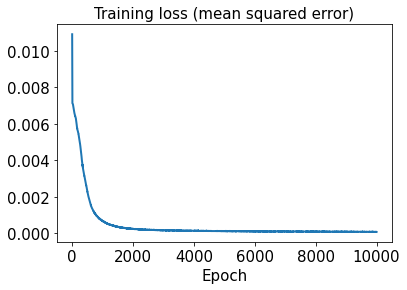

In [35]:
hist = history.history
plt.plot(hist['loss'], lw=2)
plt.title('Training loss (mean squared error)', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

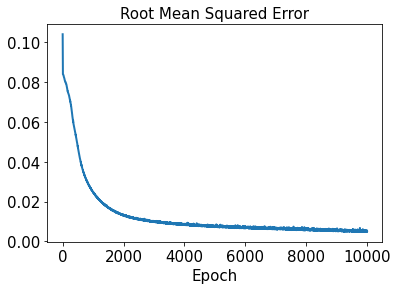

In [36]:
plt.plot(hist['rmse'], lw=2)
plt.title('Root Mean Squared Error', size=15)
plt.xlabel('Epoch', size=15)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.show()

In [37]:
test_results = sd.evaluate(tsr_theta_train)

13/13 [==============================] - 0s 2ms/step - loss: 5.0295e-05 - rmse: 0.0000e+00


In [38]:
decoded_train = sd.predict(tsr_theta_train)

In [39]:
decoded_test = sd.predict(tsr_theta_test)

In [40]:
error_train_abs = np.abs(decoded_train - y_train)

In [41]:
error_test_abs = np.abs(decoded_test - y_test)

In [42]:
l2_error_train = np.sum((decoded_train - y_train)**2) / np.sum(y_train**2)
print(l2_error_train)

0.002466132


In [43]:
l2_error_test = np.sum((decoded_test - y_test)**2) / np.sum(y_test**2)
print(l2_error_test)

0.0094307205


In [44]:
l2_error_train_list = []
for i in range(0, len(x_train)):
    l2_error_train_data = np.sum((decoded_train[i] - y_train[i])**2) / np.sum(y_train[i]**2)
    l2_error_train_list.append(l2_error_train_data)
print(l2_error_train_list)

[0.002430464, 0.002946845, 0.0016931837, 0.0019047922, 0.0043736068, 0.001169136, 0.0020356574, 0.0016665382, 0.0022434501, 0.002500567, 0.0049443566, 0.0019477797, 0.0017409784, 0.0052868715, 0.0042846766, 0.0012718567, 0.0024482608, 0.0013799508, 0.001890853, 0.0020891682, 0.001533415, 0.0021395271, 0.0024053752, 0.004339715, 0.0016775093, 0.002058882, 0.0021775214, 0.0011300709, 0.001214667, 0.0016010548, 0.00267536, 0.0021233566, 0.0031700025, 0.0021350635, 0.0025357492, 0.0019985994, 0.0014671613, 0.0024513232, 0.0017937705, 0.0042493036, 0.002183226, 0.0027536459, 0.002869839, 0.0062058857, 0.0009113195, 0.0012983464, 0.0024735606, 0.0018928635, 0.002457997, 0.0018323027, 0.0011617489, 0.0024991524, 0.002009943, 0.0024962383, 0.0031874096, 0.0012508382, 0.0018056737, 0.0013805341, 0.0029690762, 0.002110181, 0.001936481, 0.0019191707, 0.001337716, 0.0019005806, 0.0014638208, 0.002432019, 0.0011203741, 0.002591365, 0.0026488923, 0.0019184914, 0.004970577, 0.0045128553, 0.002188618,

In [45]:
l2_error_test_list = []
for i in range(0, len(x_test)):
    l2_error_test_data = np.sum((decoded_test[i] - y_test[i])**2) / np.sum(y_test[i]**2)
    l2_error_test_list.append(l2_error_test_data)
print(l2_error_test_list)

[0.044244356, 0.0047678915, 0.0032867852, 0.0043902267, 0.0020251265, 0.031363226, 0.023791451, 0.0067059365, 0.002911762, 0.0040016505, 0.08399666, 0.002604099, 0.0016586733, 0.0036322465, 0.0034548594, 0.0052816123, 0.0026576153, 0.0029142855, 0.034731586, 0.0021141993, 0.0038394418, 0.002909586, 0.0034916552, 0.0015838859, 0.0017705223, 0.0058201677, 0.0074056773, 0.0068269363, 0.0017670052, 0.004917414, 0.003728873, 0.0065635885, 0.0027251896, 0.002874649, 0.0020826827, 0.04211115, 0.003704457, 0.002865003, 0.003262621, 0.003885227, 0.0032678929, 0.005615957, 0.0042815846, 0.0030450039]


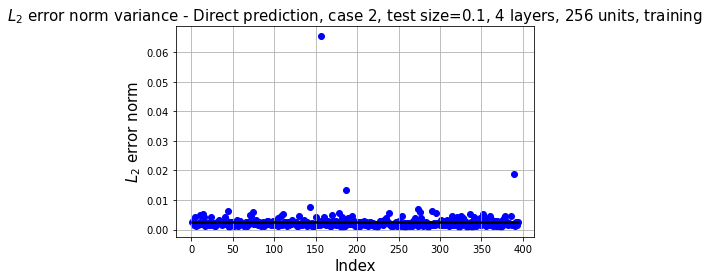

In [50]:
plt.plot(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]),
         l2_error_train*np.ones(x_train.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, tsr_theta_train.shape[0], tsr_theta_train.shape[0]), l2_error_train_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 4 layers, 256 units, training', fontsize=15)
plt.grid()
plt.tight_layout()
plt.show()

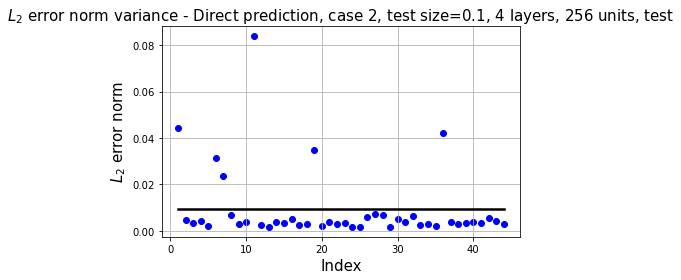

In [51]:
plt.plot(np.linspace(1, tsr_theta_test.shape[0], tsr_theta_test.shape[0]),
         l2_error_test*np.ones(tsr_theta_test.shape[0],), 'k', lw=2.5)
plt.scatter(np.linspace(1, x_test.shape[0], tsr_theta_test.shape[0]), l2_error_test_list, c='b')
plt.xlabel('Index', fontsize=15)
plt.ylabel('$L_2$ error norm', fontsize=15)
plt.title('$L_2$ error norm variance - Direct prediction, case 2, test size=0.1, 4 layers, 256 units, test', fontsize = 15)
plt.grid()
plt.tight_layout()
plt.show()

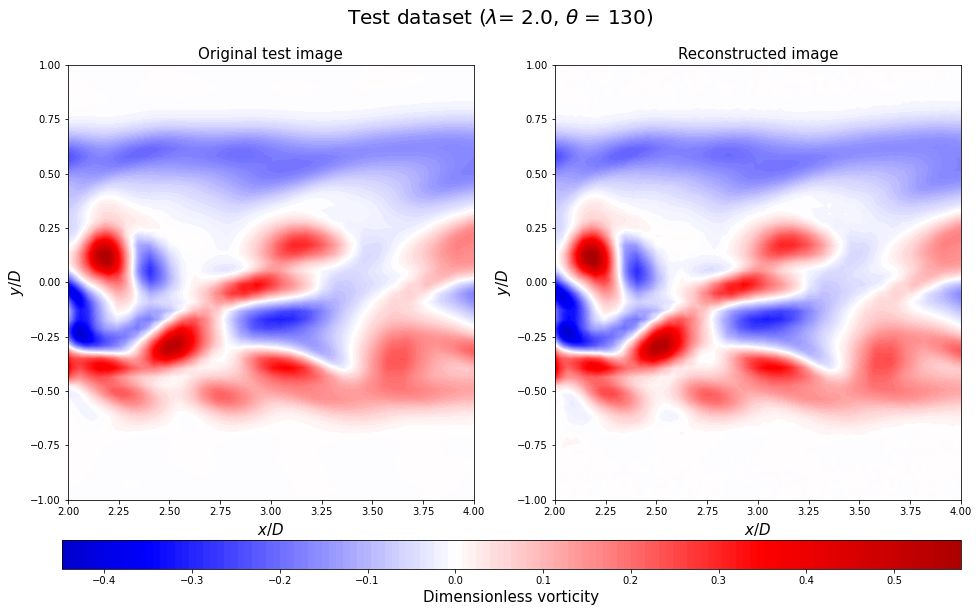

In [48]:
plt.figure(figsize=(16, 8))
y_test3_rotate = y_test[3].T.reshape(100, 100)
decoded_rotate = decoded_test[3].T.reshape(100, 100)

xrange = np.linspace(2, 4, 100)
yrange = np.linspace(-1, 1, 100)
xmesh, ymesh = np.meshgrid(xrange, yrange)

ax = plt.subplot(1, 2, 1)
#plt.contourf(xtest_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(xtest_rotate2, levels=11, cmap=parula_map)
a1 = plt.contourf(xmesh, ymesh, y_test3_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Original test image', fontsize=15)

# Display reconstruction
ax = plt.subplot(1, 2, 2)
#plt.contourf(decoded_rotate2, vmin=3, vmax=10, levels=11, cmap=parula_map)
#plt.contourf(decoded_rotate2, levels=11, cmap=parula_map)
a2 = plt.contourf(xmesh, ymesh, decoded_rotate, levels=128, cmap='seismic')
ax.set_xlabel('$x/D$', fontsize=15)
ax.set_ylabel('$y/D$', fontsize=15)
#ax.get_xaxis().set_visible(False)
#ax.get_yaxis().set_visible(False)
ax.set_title('Reconstructed image', fontsize=15)
a1.set_clim(-0.7,0.7)
a2.set_clim(-0.7,0.7)
cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(a1, cax=cax, orientation="horizontal")
cbar.set_label('Dimensionless vorticity', fontsize=15)
cbar.set_ticks([-0.5, -0.4, -0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])

plt.suptitle(r'Test dataset ($\lambda$= %.1f, $\theta$ = %d)' %(tsr_test[3], theta_test[3]),fontsize=20)
plt.show()

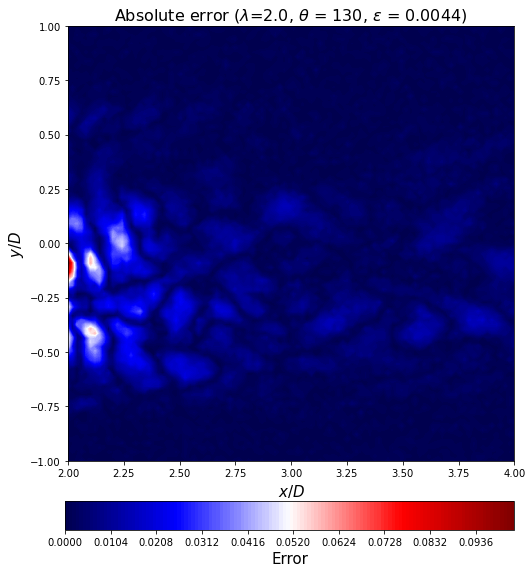

In [49]:
error_test_abs3_rotate = error_test_abs[3].T.reshape(100, 100)

fig5 = plt.figure(figsize = (8, 8))
ax5 = fig5.add_subplot(111)
mappable = ax5.contourf(xmesh, ymesh, error_test_abs3_rotate, levels=128, cmap='seismic')
ax5.set_title(r'Absolute error ($\lambda$=%.1f, $\theta$ = %d, $\epsilon$ = %.4f)' %(tsr_test[3],theta_test[3], l2_error_test_list[3]), fontsize=16)
ax5.set_xlabel('$x/D$', fontsize=15)
ax5.set_ylabel('$y/D$', fontsize=15)

cax = plt.axes([0.12, 0.005, 0.78, 0.05])
cbar = plt.colorbar(mappable, cax=cax, orientation="horizontal")
cbar.set_label('Error', fontsize=15)

plt.show()